In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import pyodbc
import cx_Oracle
%matplotlib inline

In [255]:
# conn = pyodbc.connect('DRIVER={SQL Server};SERVER=10.0.185.138;DATABASE=JYDB;UID=js_dev;PWD=js_dev')
conn = cx_Oracle.connect('js_dev', '123456', 'wind')

In [551]:
# query = 'SELECT f.EndDate, t.SecuCode, f.NetProfitCut \
# FROM LC_MainIndexNew as f, SecuMain as t \
# WHERE t.InnerCode = f.CompanyCode \
#     AND t.SecuCategory = 1 \
#     AND (t.ListedSector = 1 OR t.ListedSector = 2 OR t.ListedSector = 6) \
#     AND t.ListedState = 1'
query = 'select t.S_INFO_WINDCODE, t.REPORT_PERIOD, t.S_QFA_CGRNETPROFIT from wind.AShareFinancialIndicator t'

In [552]:
df = pd.read_sql_query(query, con=conn)

In [553]:
df.tail()

,S_INFO_WINDCODE,REPORT_PERIOD,S_QFA_CGRNETPROFIT
170722,603022.SH,20171231,-16.7805
170723,300167.SZ,20171231,-181.2191
170724,000417.SZ,20171231,-151.9905
170725,300180.SZ,20171231,-50.7775
170726,300417.SZ,20171231,31.1837


In [554]:
df = df.set_index('REPORT_PERIOD').sort_index().dropna()

In [555]:
df.index = pd.to_datetime(df.index, format='%Y%m%d')

In [556]:
df = df[df.index >= '2000-01-01']

In [557]:
df.tail()

,S_INFO_WINDCODE,S_QFA_CGRNETPROFIT
REPORT_PERIOD,,
2018-06-30,600696.SH,3.3712
2018-06-30,002107.SZ,20.2458
2018-06-30,300034.SZ,27.4299
2018-06-30,000818.SZ,-11.8029
2018-06-30,002240.SZ,1199.2807


In [558]:
df = df.pivot_table('S_QFA_CGRNETPROFIT', index=['REPORT_PERIOD', 'S_INFO_WINDCODE']).unstack()

In [559]:
df.tail()

S_QFA_CGRNETPROFIT                                           \
S_INFO_WINDCODE          000001.SZ 000002.SZ 000003.SZ 000004.SZ  000005.SZ   
REPORT_PERIOD                                                                 
2017-06-30                  2.0277  850.1298  207.3340 -120.2185    24.8835   
2017-09-30                  4.0852  -42.6654       NaN   35.9245   120.2702   
2017-12-31                -38.8392  347.7184       NaN  942.3240  1941.5820   
2018-03-31                 63.4044  -94.7238 -198.2367  -85.2831   -48.7740   
2018-06-30                     NaN       NaN       NaN       NaN        NaN   

                                                                      \
S_INFO_WINDCODE 000006.SZ  000007.SZ  000008.SZ 000009.SZ  000010.SZ   
REPORT_PERIOD                                                          
2017-06-30        40.3325  7400.0953   396.5967   39.2510    21.3888   
2017-09-30       -38.5717  -151.6015    42.6985  115.3974   390.4751   
2017-12-31       421.0519   157.1634  1035.8159 -147.0883 -1944.0779   
2018-03-31       -38.6478  -226.2682   -98.6002  174.5288    95.6648   
2018-06-30            NaN        NaN        NaN       NaN        NaN   

                   ...                                                       \
S_INFO_WINDCODE    ...    A18006.SH A18007.SZ A18016.SZ A18018.SH A18030.SH   
REPORT_PERIOD      ...                                                        
2017-06-30         ...          NaN   55.2220       NaN   186.723    5.4518   
2017-09-30         ...     126.0181       NaN       NaN       NaN   -9.2876   
2017-12-31         ...     -21.6064       NaN       NaN       NaN  -59.0076   
2018-03-31         ...          NaN  -70.0767   18.9116   -58.171       NaN   
2018-06-30         ...          NaN       NaN       NaN       NaN       NaN   

                                                                   
S_INFO_WINDCODE A18033.SZ A18045.SH A18048.SZ A18049.SZ T00018.SH  
REPORT_PERIOD                                                      
2017-06-30       -15.8687  -47.7949       NaN       NaN       NaN  
2017-09-30        -9.7582       NaN       NaN       NaN       NaN  
2017-12-31       -68.2731       NaN       NaN       NaN       NaN  
2018-03-31       204.5107   60.8661       NaN       NaN       NaN  
2018-06-30            NaN       NaN       NaN       NaN       NaN  

[5 rows x 3807 columns]

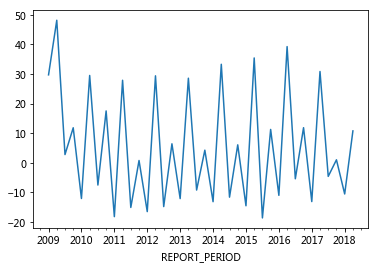

In [560]:
df[df.index >= '2009-01-01'].median(axis=1).plot()

In [562]:
df['S_QFA_CGRNETPROFIT'].median(axis=1).to_excel(u'./归母净利润环比.xlsx')

In [563]:
df['S_QFA_CGRNETPROFIT']['000002.SZ']

REPORT_PERIOD
2000-06-30         NaN
2000-09-30         NaN
2000-12-31         NaN
2001-03-31         NaN
2001-06-30         NaN
2001-09-30         NaN
2001-12-31         NaN
2002-03-31         NaN
2002-06-30    265.2342
2002-09-30    -59.7471
2002-12-31    334.8409
2003-03-31    -79.0480
2003-06-30    305.3143
2003-09-30    -60.1511
2003-12-31    307.4642
2004-03-31    -61.0417
2004-06-30     99.9486
2004-09-30    -66.4692
2004-12-31    600.6194
2005-03-31    -48.8918
2005-06-30    115.6040
2005-09-30    -85.8709
2005-12-31    523.6202
2006-03-31    -14.2785
2006-06-30    109.7183
2006-09-30    -78.7537
2006-12-31    362.0110
2007-03-31    -27.4909
2007-06-30     72.3935
2007-09-30    -76.4234
                ...   
2011-03-31    -69.9551
2011-06-30     47.0965
2011-09-30    -65.8120
2011-12-31    896.7676
2012-03-31    -76.8922
2012-06-30     66.8520
2012-09-30    -41.8327
2012-12-31    451.4677
2013-03-31    -78.3986
2013-06-30     82.3157
2013-09-30    -45.4896
2013-12-31    458.52

In [200]:
dates = [date for date in df.index if date.month==12]

In [202]:
df.loc[dates].median(axis=1, skipna=True)

REPORT_PERIOD
2001-12-31   -10.51590
2002-12-31   -19.71495
2003-12-31    12.35390
2004-12-31    -5.21480
2005-12-31    -5.88250
2006-12-31    46.49930
2007-12-31    42.94070
2008-12-31   -49.21490
2009-12-31    66.88050
2010-12-31    20.73080
2011-12-31    -4.46800
2012-12-31     0.72770
2013-12-31    10.55705
2014-12-31     8.15360
2015-12-31     2.79005
2016-12-31    16.22260
2017-12-31     9.74020
dtype: float64

In [565]:
df.iloc[-1].dropna()

                    S_INFO_WINDCODE
S_QFA_CGRNETPROFIT  000818.SZ           -11.8029
                    002107.SZ            20.2458
                    002240.SZ          1199.2807
                    002462.SZ            11.2024
                    002565.SZ          -108.9571
                    002772.SZ          -157.9834
                    300001.SZ            15.9384
                    300034.SZ            27.4299
                    300478.SZ          1831.1680
                    600696.SH             3.3712
                    600805.SH            46.3755
                    601606.SH            10.3902
                    603199.SH            -1.5963
                    603587.SH            28.0067
                    603707.SH           -13.3013
                    603713.SH             2.1097
Name: 2018-06-30 00:00:00, dtype: float64